In [17]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../../../')

import warnings
import pytest
from pathlib import Path
from collections import defaultdict

from fiberphotometry.config import PLOTTING_CONFIG
from fiberphotometry.data.data_loading import DataContainer, load_all_sessions
from fiberphotometry.data.session_loading import populate_containers
from fiberphotometry.data.syncer import sync_session
from fiberphotometry.data.timepoint_processing import create_event_idxs_container_for_sessions
from fiberphotometry.processing.plotting_setup import PlottingSetup
from fiberphotometry.processing.signal_info_setup import assign_sessions_signal_info

# adjust to your project layout
SRC = Path("/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/src/trial_Gq-DREADD_CPT")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
sessions = load_all_sessions(
            baseline_dir=str(SRC),
            session_type="cpt",
            remove_bad_signal_sessions=True
        )

Processing trial directories:   0%|          | 0/54 [00:00<?, ?it/s]/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/leonie/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 2.0' has only two tokens; assuming metric is 'mg/kg'.
  warnings.warn(
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/leonie/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 0.1' has only two tokens; assuming metric is 'mg/kg'.
  warnings.warn(
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/leonie/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 0.5' has only two tokens; assuming metric is 'mg/kg'.
  warnings.warn(
/Users/fsp585/Desktop/GetherLabCode/FiberphotometryCode/fiberphotometry/notebooks/leonie/../../../fiberphotometry/data/data_loading.py:194: UserWarning: Drug info 'CNO 2.0' has only two tokens; assuming metric is 'm

In [19]:
populate_containers(sessions)

In [20]:
for session in sessions:
    sync_session(session)

Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating 'phot_470': removed 1 rows
Truncating '

In [21]:
def actions_attr_dict_for():
    return {
            "Hit":      "hit",
            "Mistake":  "mistake",
            "Missed Hit":"miss",
            "Correction Trial Correct Rejection":"cor_reject",
            "Correct Rejection":"cor_reject"
        }

def reward_attr_dict_for():
    return {"Reward Collected Start ITI":"reward_collect"}

In [22]:
create_event_idxs_container_for_sessions(
    sessions,
    actions_attr_dict_for(),
    reward_attr_dict_for())

In [23]:
# 3) Plotting setup
PlottingSetup(**PLOTTING_CONFIG['cpt']) \
    .apply_plotting_setup_to_sessions(sessions)

# 4) Signal‐info
assign_sessions_signal_info(sessions)

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def update_genotypes(sessions, mice_gen_dict):
    """
    Updates the genotypes for a list of sessions based on the provided genotype mapping.
    Prints whether the genotypes are valid ('TH-Cre', 'Wildtype') 
    and the number of genotype changes made.

    Parameters:
    - sessions: A list of session objects to process.
    - mice_gen_dict: A dictionary mapping mouse IDs to new genotypes.
    """
    geno_mapping = {
        "Cre": "TH-Cre",
        "WT": "Wildtype"
    }
    # Map mice_gen_dict to use TH-Cre and Wildtype
    mapped_genotypes = {k: geno_mapping[v] for k, v in mice_gen_dict.items()}
    
    # Initialize counters and trackers
    valid_genotypes = {'TH-Cre', 'Wildtype'}
    all_genotypes = set()
    genotype_changes = 0

    for session in sessions:
        original_genotype = session.genotype
        int_id = int(session.mouse_id)
        
        if int_id in mapped_genotypes:
            session.genotype = mapped_genotypes[int_id]
            # Count changes if the genotype was updated
            if session.genotype != original_genotype:
                genotype_changes += 1
        
        all_genotypes.add(session.genotype)
    
    # Print results
    if all_genotypes.issubset(valid_genotypes):
        print(f"Valid genotypes found: {all_genotypes}")
    else:
        print(f"Invalid genotypes found: {all_genotypes}")
    
    print(f"Genotype changes made: {genotype_changes}")

In [26]:
mice_gen_dict = {
    69: "Cre",
    71: "WT",
    73: "Cre",
    75: "WT",
    77: "Cre",
    79: "WT",
    85: "WT",
    87: "WT",
    135: "WT",
    137: "WT",
    139: "Cre",
    133: "WT",
    127: "WT",
    125: "WT",
    129: "Cre",
    131: "WT",
    143: "Cre",
    145: "WT",
    147: "WT",
    157: "Cre",
    159: "Cre",
    161: "WT",
    171: "Cre",
    173: "Cre"
}

In [27]:
update_genotypes(sessions, mice_gen_dict)

Valid genotypes found: {'TH-Cre', 'Wildtype'}
Genotype changes made: 2


In [28]:
from fiberphotometry.analysis import performance_funcs

In [29]:
from scipy.interpolate import interp1d
from scipy import stats

In [30]:
for s in sessions:
    print(s.drug_infos[0])

{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'CNO', 'dose': '2.0', 'metric': 'mg/kg'}
{'name': 'Vehicle', 'dose': None, 'metric': None}
{'name': 'CNO', 'dose': '0.1', 'metric': 'mg/kg'}


In [31]:
import numpy as np
from fiberphotometry.analysis import performance_funcs

def calculate_binned_performance(session, bin_size_minutes=5):
    """
    Computes performance metrics directly for discrete time bins.
    This version uses session.trial_id.
    """
    # 1. Get all relevant events for the 30-minute analysis window
    raw_df = session.dfs.data['raw']
    filtered_df = raw_df.loc[session.events_of_interest_df["index"]]
    filtered_df = filtered_df[~filtered_df['Item_Name'].isin(['Display Image'])]
    
    event_times = filtered_df['sec_from_zero'].values
    event_names = filtered_df['Item_Name'].values
    
    blank_image_time = raw_df.iloc[session.cpt]['sec_from_zero']
    start_time = blank_image_time
    end_time = blank_image_time + 30 * 60  # 30 minutes
    
    time_mask = (event_times >= start_time) & (event_times < end_time)
    
    all_event_times = event_times[time_mask]
    all_event_names = event_names[time_mask]
    
    # 2. Prepare for binning
    required_keys = ['hit', 'miss', 'mistake', 'cor_reject']
    binned_results = {}
    num_bins = int((30 * 60) / (bin_size_minutes * 60))

    # 3. Loop through each bin, get events, and calculate metrics
    for i in range(num_bins):
        bin_start_sec = start_time + (i * bin_size_minutes * 60)
        bin_end_sec = start_time + ((i + 1) * bin_size_minutes * 60)
        bin_label = f"{i*5}-{(i+1)*5} min"
        
        bin_mask = (all_event_times >= bin_start_sec) & (all_event_times < bin_end_sec)
        events_in_bin = all_event_names[bin_mask]

        counts = {key: sum(1 for ev in events_in_bin if ev.lower() == key) for key in required_keys}

        dp = performance_funcs.d_prime(counts)
        cs = performance_funcs.c_score(counts)
        
        metrics_for_bin = {
            'd_prime': dp if dp is not None else np.nan, # Use NaN for easier plotting
            'c_score': cs if cs is not None else np.nan,
            'participation': performance_funcs.participation(counts),
            'total_hits': performance_funcs.total_hits(counts),
            'total_mistakes': performance_funcs.total_mistakes(counts),
            'hit_rate': performance_funcs.hit_rate(counts),
            'false_alarm_rate': performance_funcs.false_alarm_rate(counts)
        }
        binned_results[bin_label] = metrics_for_bin
        
    return binned_results

In [32]:
sorted(list(set([(s.mouse_id, s.genotype) for s in sessions])), key=lambda t: t[1])

[('159', 'TH-Cre'),
 ('143', 'TH-Cre'),
 ('77', 'TH-Cre'),
 ('173', 'TH-Cre'),
 ('171', 'TH-Cre'),
 ('69', 'TH-Cre'),
 ('129', 'TH-Cre'),
 ('157', 'TH-Cre'),
 ('161', 'Wildtype'),
 ('135', 'Wildtype'),
 ('131', 'Wildtype'),
 ('127', 'Wildtype'),
 ('145', 'Wildtype'),
 ('87', 'Wildtype'),
 ('125', 'Wildtype'),
 ('137', 'Wildtype'),
 ('79', 'Wildtype'),
 ('85', 'Wildtype'),
 ('147', 'Wildtype')]

In [33]:
include_mice  = ["79", "85", "87", "125", "127", "131", "135", "137", "145", "147", "161", "77", "129", "143", "159", "171", "173"]

/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:78: FutureWarning: Use "auto" to set automatic grayscale colors. Fro

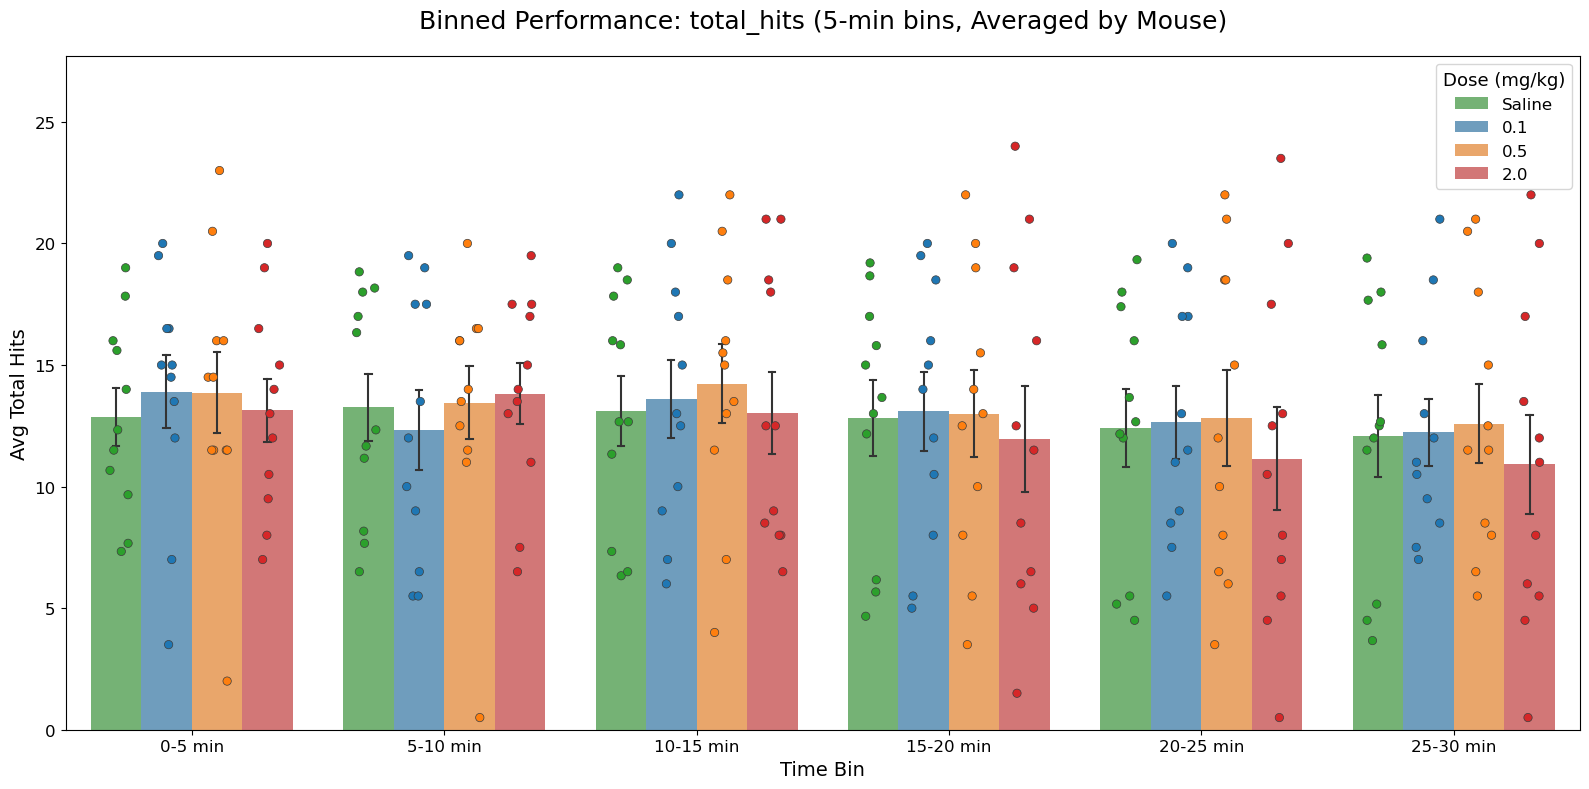

/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:78: FutureWarning: Use "auto" to set automatic grayscale colors. Fro

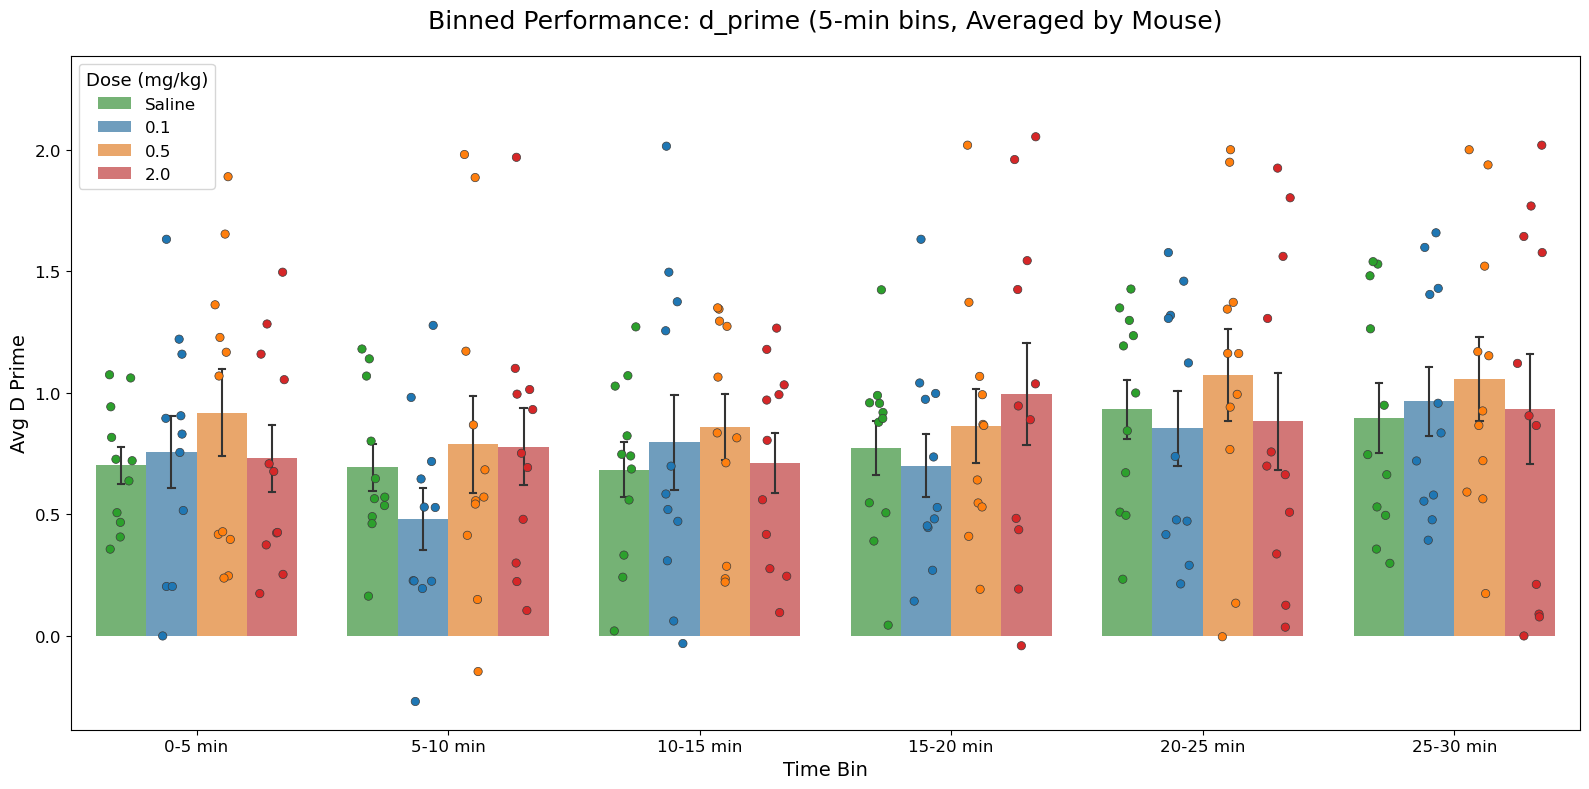

/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:78: FutureWarning: Use "auto" to set automatic grayscale colors. Fro

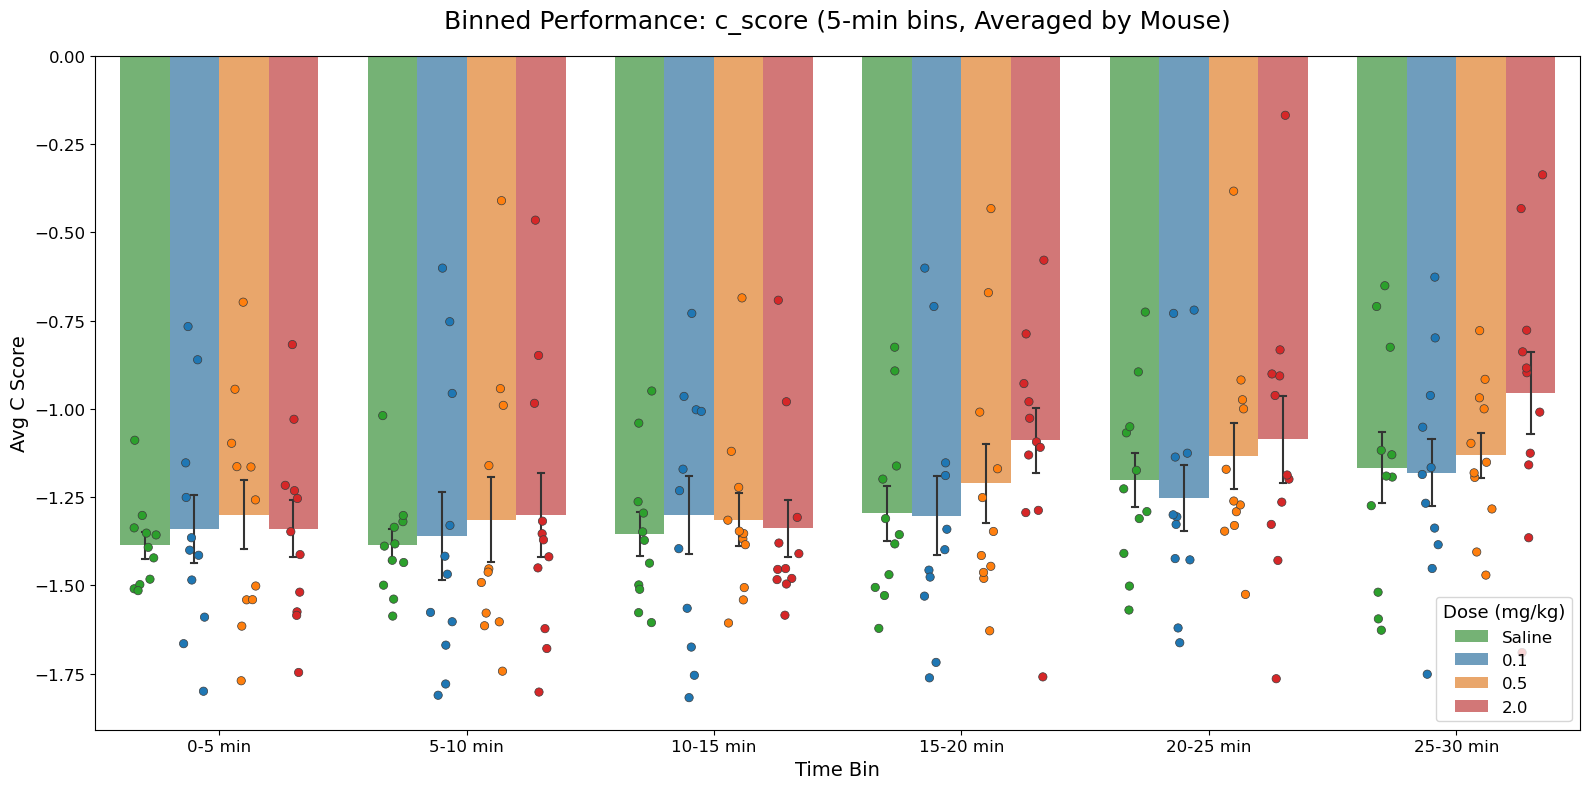

/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:78: FutureWarning: Use "auto" to set automatic grayscale colors. Fro

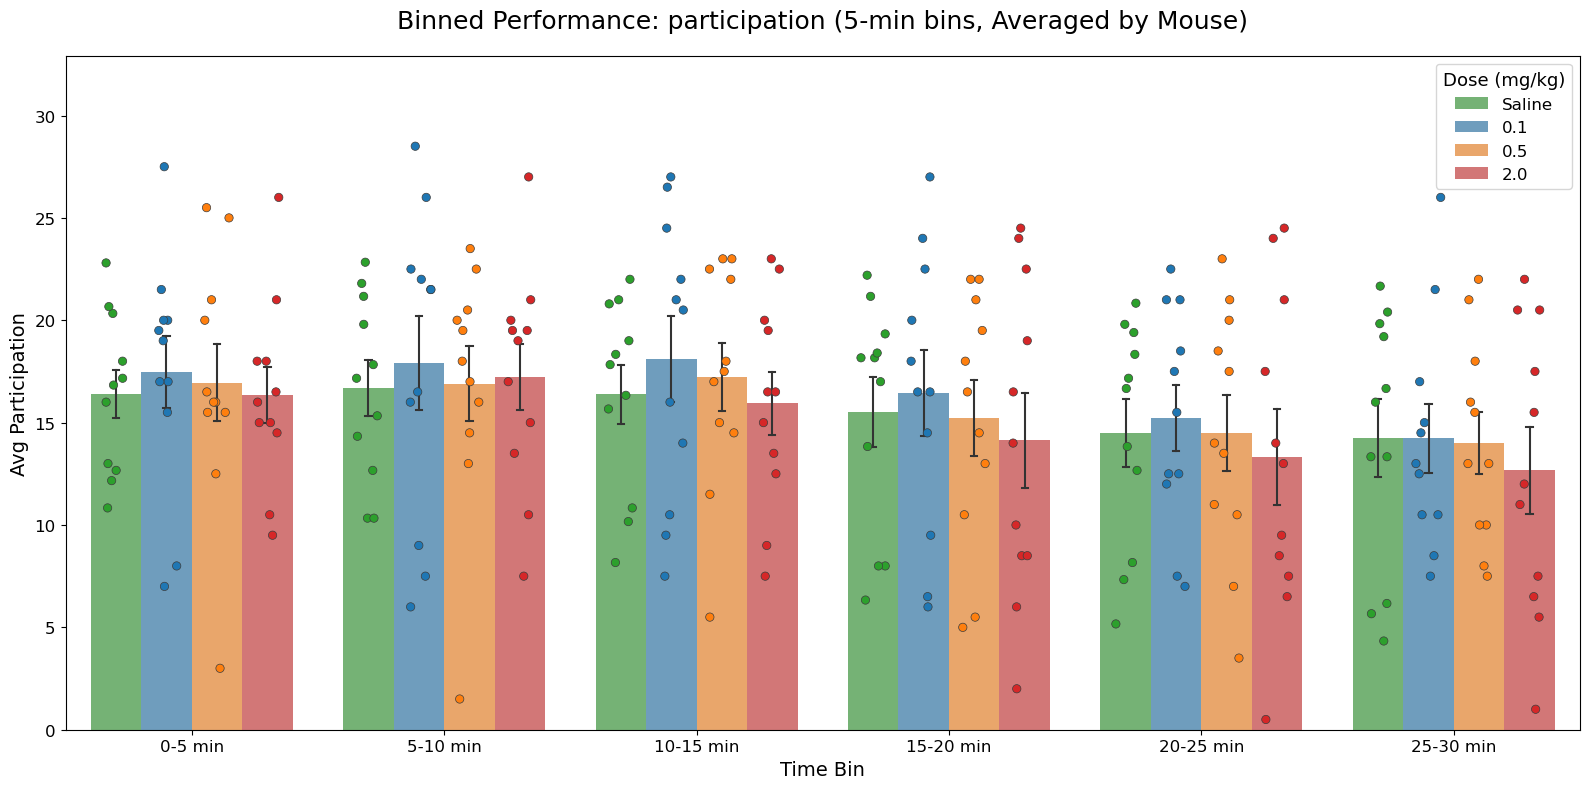

/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:78: FutureWarning: Use "auto" to set automatic grayscale colors. Fro

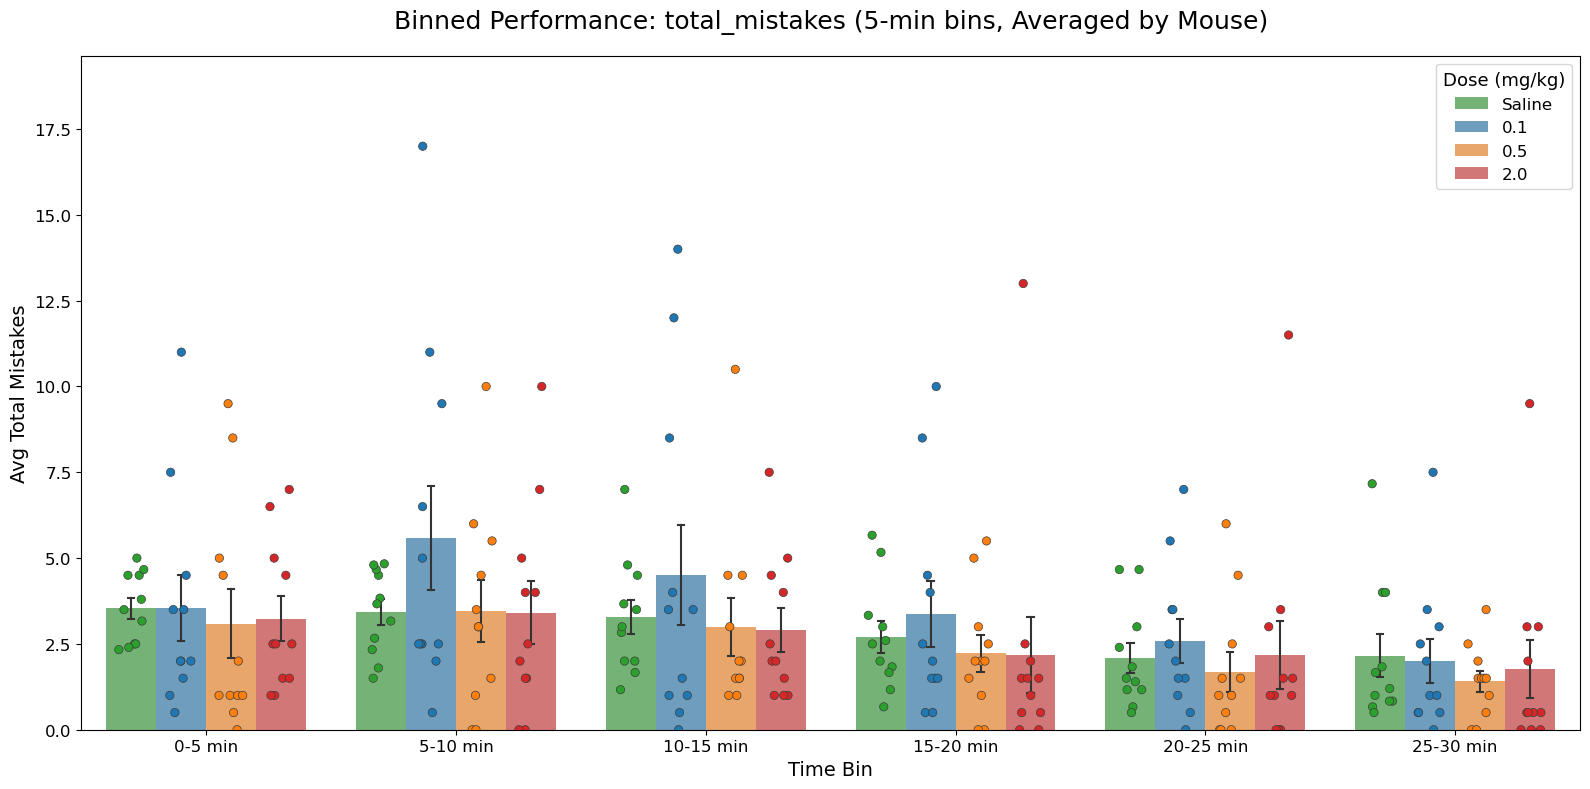

/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:78: FutureWarning: Use "auto" to set automatic grayscale colors. Fro

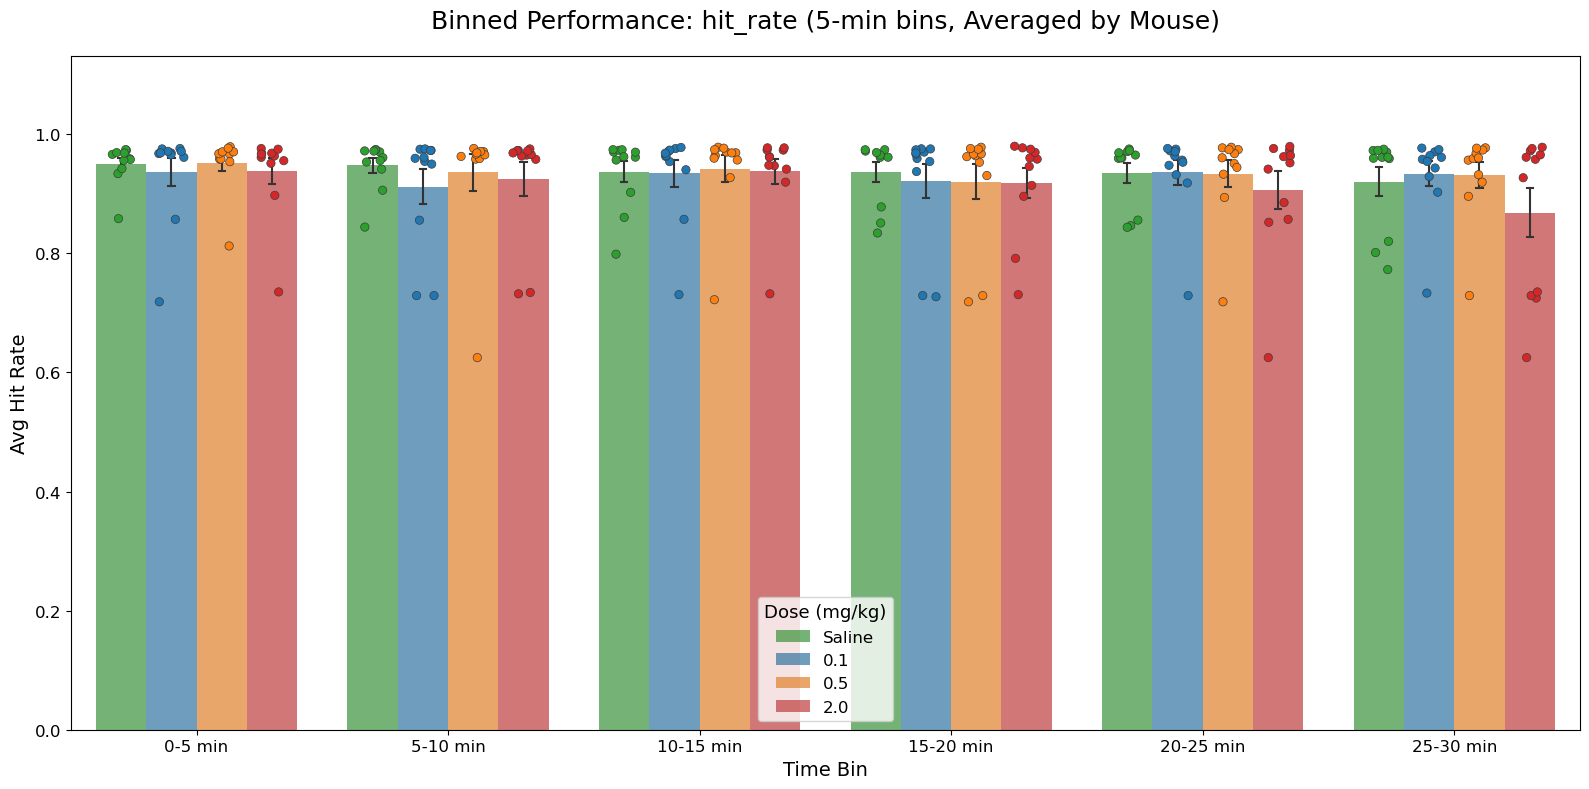

/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '.2'}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:76: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.5}` instead.

  sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/561935500.py:78: FutureWarning: Use "auto" to set automatic grayscale colors. Fro

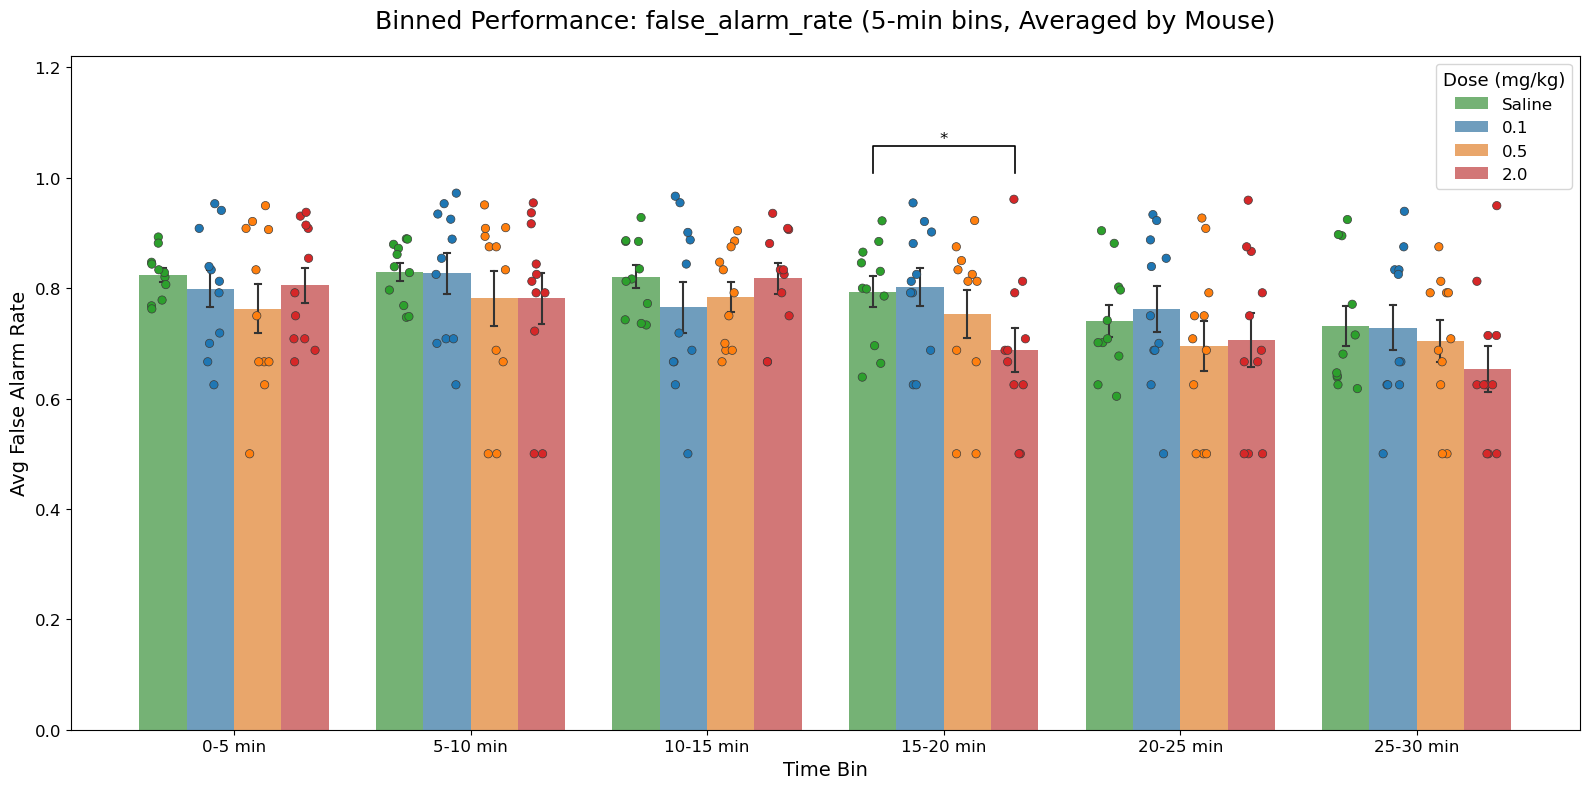

In [34]:
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

# --- 1. Define Parameters ---
bin_size_minutes = 5
dose_conditions = ['Saline', '0.1', '0.5', '2.0'] 
metric_keys = ['total_hits', 'd_prime', 'c_score', 'participation', 'total_mistakes', 'hit_rate', 'false_alarm_rate']
color_order = ['C2', 'C0', 'C1', 'C3']
dose_color_map = {dose: color for dose, color in zip(dose_conditions, color_order)}

# --- 2. Aggregate Data by Session (Intermediate Step) ---
all_session_data = []
for session in sessions:
    if session.mouse_id not in include_mice:
        continue
    if session.genotype != 'Wildtype':
        continue

    try:
        binned_metrics = calculate_binned_performance(session, bin_size_minutes)
        
        dose_val = session.drug_infos[0]['dose']
        dose_str = "Saline" if dose_val is None else str(dose_val)

        for time_bin, metrics in binned_metrics.items():
            for metric_name, value in metrics.items():
                all_session_data.append({
                    "mouse_id": session.mouse_id, # Added mouse_id for grouping
                    "session_id": session.trial_id,
                    "dose": dose_str,
                    "metric": metric_name,
                    "time_bin": time_bin,
                    "value": float(value)
                })
    except Exception as e:
        print(f"Skipping session {session.trial_id} for mouse {session.mouse_id} due to error: {e}")

# Create DataFrame with one row per session
session_df = pd.DataFrame(all_session_data)


# --- NEW: Aggregate by Mouse ID ---
# This is the key step. We group by mouse, dose, metric, and time bin,
# then calculate the mean value. Each row in this new DataFrame will
# represent the average performance of one mouse in one condition.
mouse_avg_df = session_df.groupby(
    ['mouse_id', 'dose', 'metric', 'time_bin']
)['value'].mean().reset_index()


# --- 3. Plotting and Statistical Analysis (using the mouse-averaged data) ---

def p_value_to_stars(p):
    """Convert p-value to significance stars."""
    if p < 0.001: return '***'
    if p < 0.01: return '**'
    if p < 0.05: return '*'
    return 'ns'

def add_stat_annotation(ax, x1, x2, y, h, text):
    """Draws a bracket and significance star on the plot."""
    ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.2, c='k')
    ax.text((x1 + x2) * 0.5, y + h, text, ha='center', va='bottom', color='k', fontsize=12)

# The rest of the code now uses `mouse_avg_df`
for metric_name in metric_keys:
    plt.figure(figsize=(16, 8))
    ax = plt.gca()

    # Use the mouse-averaged DataFrame for plotting
    metric_df = mouse_avg_df[mouse_avg_df['metric'] == metric_name].dropna(subset=['value'])
    time_bin_order = sorted(metric_df['time_bin'].unique(), key=lambda x: int(x.split('-')[0]))

    # capsize adds the small horizontal lines to the top and bottom of the error bar.
    sns.barplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, alpha=0.7, ax=ax, errorbar="se", capsize=0.1, errcolor=".2", errwidth=1.5)
    
    sns.stripplot(data=metric_df, x='time_bin', y='value', hue='dose', order=time_bin_order, hue_order=dose_conditions, palette=dose_color_map, dodge=True, jitter=0.2, s=6, ax=ax, edgecolor='gray', linewidth=0.5)

    # --- Annotation Logic (works on mouse averages) ---
    bar_width = 0.8 / len(dose_conditions)
    for i, time_bin in enumerate(time_bin_order):
        bin_df = metric_df[metric_df['time_bin'] == time_bin]
        # Control data is now the list of averages from control mice
        control_data = bin_df[bin_df['dose'] == 'Saline']['value'].dropna()

        y_max = bin_df['value'].max() if not bin_df.empty else 0
        y_level = y_max * 1.05
        y_step = y_max * 0.1 if y_max > 0 else 0.1

        for j, dose in enumerate(dose_conditions[1:]):
            # Treatment data is the list of averages from treated mice
            treatment_data = bin_df[bin_df['dose'] == dose]['value'].dropna()

            if len(control_data) > 1 and len(treatment_data) > 1:
                _, p_val = ttest_ind(control_data, treatment_data, equal_var=False)
                stars = p_value_to_stars(p_val)

                if stars != 'ns':
                    x_control = i - 0.4 + (0 * bar_width + bar_width / 2)
                    x_treatment = i - 0.4 + ((j + 1) * bar_width + bar_width / 2)
                    add_stat_annotation(ax, x_control, x_treatment, y_level, y_step * 0.5, stars)
                    y_level += y_step

    # Final Touches
    plt.title(f"Binned Performance: {metric_name} (5-min bins, Averaged by Mouse)", fontsize=18, pad=20)
    plt.xlabel("Time Bin", fontsize=14)
    plt.ylabel(f"Avg {metric_name.replace('_', ' ').title()}", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)

    handles, labels = ax.get_legend_handles_labels()
    n_doses = len(dose_conditions)
    ax.legend(handles[:n_doses], labels[:n_doses], title="Dose (mg/kg)", fontsize=12, title_fontsize=13)
    ax.set_ylim(top=ax.get_ylim()[1] * 1.1)
    plt.tight_layout()

    # --- Added savefig lines ---
    base_filename = f"Binned_Performance_{metric_name}_AvgByMouse_wt_sem"
    # plt.savefig(f"{base_filename}.png", dpi=300)
    # plt.savefig(f"{base_filename}.pdf")
    # plt.savefig(f"{base_filename}.svg")

    plt.show()

In [35]:
# --- Save Summary Statistics to Excel ---

# 1. Calculate the mean and standard error across mice for each group
summary_stats_df = mouse_avg_df.groupby(['dose', 'time_bin', 'metric'])['value'].agg(['mean', 'sem']).reset_index()

# 2. Pivot the summary data to create a hierarchical column structure
summary_pivot_df = summary_stats_df.pivot_table(
    index=['dose', 'time_bin'],
    columns='metric',
    values=['mean', 'sem']
)

# 3. (Optional but recommended) Reorder columns to group by metric for better readability
# This will result in columns like: (c_score, mean), (c_score, sem), (d_prime, mean), etc.
summary_pivot_df = summary_pivot_df.swaplevel(0, 1, axis=1).sort_index(axis=1)

# 4. Save the pivoted data to an Excel file
# The multi-level columns will be automatically created in the spreadsheet.
summary_pivot_df.to_excel('performance_summary.xlsx')

print("Successfully saved summary statistics to 'performance_summary.xlsx'")

Successfully saved summary statistics to 'performance_summary.xlsx'


In [36]:
# --- Save Detailed Mouse-Level Data to Excel ---

# Define the desired order for the rows in the Excel file.
dose_order = ['Saline', '0.1', '0.5', '2.0']
# We sort the time bins numerically based on their starting time.
time_bin_order = sorted(mouse_avg_df['time_bin'].unique(), key=lambda x: int(x.split('-')[0]))

# To ensure the final Excel sheet is sorted correctly, we convert the 'dose'
# and 'time_bin' columns to a special 'Categorical' data type with a defined order.
mouse_avg_df['dose'] = pd.Categorical(mouse_avg_df['dose'], categories=dose_order, ordered=True)
mouse_avg_df['time_bin'] = pd.Categorical(mouse_avg_df['time_bin'], categories=time_bin_order, ordered=True)


# Pivot the table to create the hierarchical row structure you want.
# Pandas will automatically use the order we defined above.
detailed_pivot_df = mouse_avg_df.pivot_table(
    index=['dose', 'time_bin', 'mouse_id'], # This creates the hierarchical rows
    columns='metric',                       # The columns will be the performance metrics
    values='value'
)

# Sort the index to ensure the final output is neatly organized.
detailed_pivot_df = detailed_pivot_df.sort_index()

# Save the pivoted data to a new Excel file.
# The multi-level index for dose, time_bin, and mouse_id will be preserved.
detailed_pivot_df.to_excel('detailed_mouse_performance.xlsx')

print("Successfully saved detailed mouse-level data to 'detailed_mouse_performance.xlsx'")

Successfully saved detailed mouse-level data to 'detailed_mouse_performance.xlsx'


/var/folders/mx/4x3wkj053dg1gcmc9yq87kw00000gn/T/ipykernel_2915/1535599040.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  detailed_pivot_df = mouse_avg_df.pivot_table(


In [37]:
# --- New version of the data loading loop ---
all_session_data = []
for session in sessions:
    if session.mouse_id not in include_mice:
        continue
    # if session.genotype == 'Wildtype': # You mentioned this logic, but to include BOTH genotypes, we should REMOVE the filter entirely.
    #     continue

    # --- MINIMAL CHANGE IS HERE ---
    # Get the drug name from the session info
    drug_name = session.drug_infos[0]['name']

    # Skip any session that is not 'Vehicle' (your control) or 'CNO' (your drug)
    if drug_name not in ['Vehicle', 'CNO']:
        continue
    # --- END OF CHANGE ---

    try:
        binned_metrics = calculate_binned_performance(session, bin_size_minutes)

        dose_val = session.drug_infos[0]['dose']
        dose_str = "Saline" if dose_val is None else str(dose_val)

        for time_bin, metrics in binned_metrics.items():
            for metric_name, value in metrics.items():
                all_session_data.append({
                    "mouse_id": session.mouse_id,
                    "genotype": session.genotype, # <-- ADD THIS
                    "session_id": session.trial_id,
                    "dose": dose_str,
                    "metric": metric_name,
                    "time_bin": time_bin,
                    "value": float(value)
                })
    except Exception as e:
        print(f"Skipping session {session.trial_id} for mouse {session.mouse_id} due to error: {e}")

# Re-create the DataFrames with the new 'genotype' column
session_df = pd.DataFrame(all_session_data)

# IMPORTANT: Update the groupby to include genotype when averaging by mouse
mouse_avg_df = session_df.groupby(
    ['genotype', 'mouse_id', 'dose', 'metric', 'time_bin'] # <-- ADD 'genotype' HERE
)['value'].mean().reset_index()

In [38]:
# --- Save Summary Statistics to Excel (Updated for Genotype) ---

# 1. Calculate the mean and standard error, now also grouping by genotype
summary_stats_df = mouse_avg_df.groupby(['genotype', 'dose', 'time_bin', 'metric'])['value'].agg(['mean', 'sem']).reset_index()

# 2. Pivot the summary data, adding 'genotype' as the top level of the index
summary_pivot_df = summary_stats_df.pivot_table(
    index=['genotype', 'dose', 'time_bin'], # <-- ADD 'genotype' HERE
    columns='metric',
    values=['mean', 'sem']
)

# 3. Reorder columns to group by metric for better readability
summary_pivot_df = summary_pivot_df.swaplevel(0, 1, axis=1).sort_index(axis=1)

# 4. Save the pivoted data to an Excel file
summary_pivot_df.to_excel('performance_summary_by_genotype.xlsx')

print("Successfully saved summary statistics by genotype to 'performance_summary_by_genotype.xlsx'")

Successfully saved summary statistics by genotype to 'performance_summary_by_genotype.xlsx'


In [39]:
# This cell creates the detailed Excel file with conditional formatting.
# You might need to install the 'openpyxl' library first:
# !pip install openpyxl

# --- Save Detailed, Colored Mouse-Level Data to Excel ---

# First, determine the string for the "mutant" genotype.
# We do this by finding the genotype in our data that is NOT 'Wildtype'.
all_genotypes = mouse_avg_df['genotype'].unique()
mutant_genotype_str = [g for g in all_genotypes if g != 'Wildtype'][0]
print(f"Identified mutant genotype as: '{mutant_genotype_str}'")


# As before, pivot the data to get the right structure
detailed_pivot_df = mouse_avg_df.pivot_table(
    index=['genotype', 'dose', 'time_bin', 'mouse_id'],
    columns='metric',
    values='value'
)

# For styling, it's much easier to work with columns than with the index.
# So, we reset the index to turn 'genotype', 'mouse_id', etc., into regular columns.
df_for_styling = detailed_pivot_df.reset_index()

# Define a function that will apply our desired style.
# It checks each row, and if the genotype is the mutant one, it applies a style.
def style_mutant_mice(row):
    """
    Checks the 'genotype' of a row. If it's the mutant,
    it returns a style for the 'mouse_id' cell in that row.
    """
    style = 'font-weight: bold; color: red'
    if row.genotype == mutant_genotype_str:
        # Return a list of styles for the entire row.
        # Only the 'mouse_id' column gets a style.
        return [style if col == 'mouse_id' else '' for col in row.index]
    else:
        # Return an empty list of styles for wildtype rows.
        return ['' for col in row.index]

# Apply the styling function to our DataFrame.
# The '.style' accessor creates a Styler object.
styled_df = df_for_styling.style.apply(style_mutant_mice, axis=1)

# Save the styled DataFrame to a new Excel file.
# We must use the 'openpyxl' engine to write styles.
styled_df.to_excel(
    'detailed_mouse_performance_colored.xlsx',
    engine='openpyxl',
    index=False # We don't need the default 0,1,2... index.
)

print("Successfully saved detailed, colored data to 'detailed_mouse_performance_colored.xlsx'")

Identified mutant genotype as: 'TH-Cre'
Successfully saved detailed, colored data to 'detailed_mouse_performance_colored.xlsx'
